## ML lab 1 
- Assignment on numpy and pandas. Recap concepts covered in class. <br>
- Use 2 datasets. One cleaned, one uncleaned. <br>
- Exploring all possible numpy operations on a specific dataset (2 of them) or creating a list or array with clear comments as per your observation and application-level understanding. <br>
- Apply 10-15 numpy (if numerical) functions or pandas (if categorical) functions on the datasets, cleanly document your code and ensure clarity for any reader. <br>

### Analysed the Datasets, these are the Tasks performed:

### Dataset 1: AmazonReviewAnalysis.csv

- AmazonReviewAnalysis.csv - Primarily text data, originally to be used for Hierarchical Analysis (further study needed). Tasks: 
    - Loading the dataset, 
    - check for missing values, 
    - description function, 
    - Examine if I can eliminate rows with missing values and doing so, 
    - eliminating duplicate entries, 
    - normalization by converting all text to lower case for uniformity, 
    - remove unnecessary spacing in columns,
    - convert cat1, cat2, cat3 to numerical data for easier processing during an ML task, 
    - plot numerical score and count for distribution understanding and outliers,
    - plot review length and count distribution to understand review sizes,
    - Length vs score analysis to see if longer reviews are more negative or positive
    - Average score given by repetitive reviewers



All necessary imports complete:

In [46]:
# Required imports and initializations
import pandas as pd
from sklearn.preprocessing import LabelEncoder as l
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
le = l()

<br><br>Data Frame successfully created from csv file.

In [47]:
# Task 1: Load the dataset
df = pd.read_csv("AmazonReviewAnalysis.csv")

<br><br>Null values found and noted for later cleaning.

In [48]:
# Task 2: Check for Missing values
print(f"The dataset has:\n{df.isnull().sum()} null values")


The dataset has:
productId      0
Title          5
userId         0
Helpfulness    0
Score          0
Time           0
Text           0
Cat1           0
Cat2           0
Cat3           0
dtype: int64 null values


<br><br>General idea of values observed as above, as part of studying the dataset.

In [49]:
# Task 3: Examine description of the dataset
print(df.describe()) 

              Score          Time
count  10000.000000  1.000000e+04
mean       4.216700  1.355203e+09
std        1.273068  4.566215e+06
min        1.000000  1.344211e+09
25%        4.000000  1.352592e+09
50%        5.000000  1.356394e+09
75%        5.000000  1.358640e+09
max        5.000000  1.362269e+09


<br><br>Any duplicate values are now removed. Only unique values will be worked with to avoid miscalculations.

In [50]:
# Task 4: Eliminating any duplicate entries
df.drop_duplicates(inplace=True)

<br><br>Since only 5 null values, not much effect to a dataset with more than 10000 entries. Better if removed.

In [51]:
# Task 5: Drop missing values
df.dropna(inplace=True)

<br><br>Successfully converted text to lowercase and removed unnecessary spaces.

In [52]:
# Task 6: Normalizing text for uniformity during later tasks, such as any language processing or text classification in future. 
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.lower()
        df[column] = df[column].str.strip()

<br><br>Based on the below plot, it is clear that reviews with 5.0 are in an overwhelming majority, suggesting that most people are happy with their products.

In [53]:
# Task 7: Find frequency of each score
print(df.groupby('Score').size())

Score
1.0     846
2.0     470
3.0     768
4.0    1502
5.0    6409
dtype: int64


<br><br>Based on the below result, clearly most reviews are between 0 and 500 characters roughly.

0       309
1       104
2       233
3       217
4       357
       ... 
9995    216
9996    113
9997    162
9998    460
9999    605
Name: Review Lengths, Length: 9995, dtype: int64


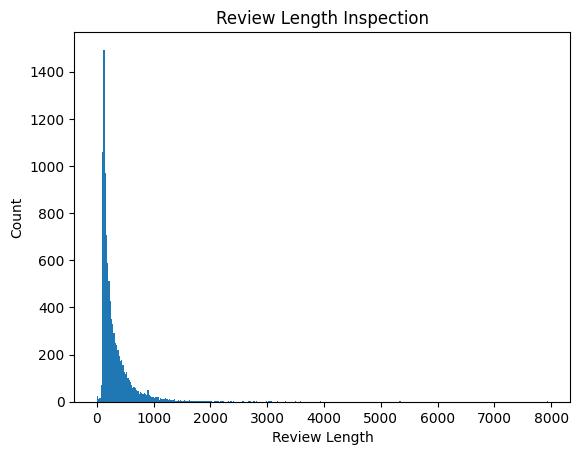

In [54]:
# Task 8: Inspecting ranges of review lengths

plt.hist((df['Text'].apply(len)), bins='auto', width=25)
plt.title("Review Length Inspection")
plt.xlabel('Review Length')
plt.ylabel('Count')

df['Review Lengths'] = df['Text'].apply(len)
print(df['Review Lengths'])

<br><br>Based on the average score of each category, we know which categories and subcategories are more popular.

In [55]:
# Task 9: Finding the average scores for each level of category.
print(df.groupby('Cat1')['Score'].mean(), "\n--------------------")
print(df.groupby('Cat2')['Score'].mean(), "\n--------------------")
print(df.groupby('Cat3')['Score'].mean())

Cat1
baby products           4.163324
beauty                  4.221077
grocery gourmet food    4.219048
health personal care    4.218614
pet supplies            4.207487
toys games              4.234792
Name: Score, dtype: float64 
--------------------
Cat2
action toy figures         4.382609
arts crafts                4.242424
baby child care            4.378378
baby food                  3.000000
baby toddler toys          4.330935
                             ...   
strollers                  4.454545
stuffed animals plush      4.496894
tools accessories          4.168831
tricycles                  4.627451
vehicles remote control    4.413333
Name: Score, Length: 64, dtype: float64 
--------------------
Cat3
accessories                      4.108108
action toy figures               4.000000
activity centers entertainers    4.181818
activity play centers            4.500000
adult toys games                 3.836735
                                   ...   
weight loss products       

In [56]:
# Task 10: Converting categories to numerical data for later classification and analysis. 
attributes = ['Cat1', 'Cat2', 'Cat3']
for i in attributes:
    df[i] = le.fit_transform(df[i])
print(df['Cat1'])

0       4
1       4
2       3
3       2
4       4
       ..
9995    3
9996    4
9997    4
9998    4
9999    3
Name: Cat1, Length: 9995, dtype: int32


Data successfully converted so that categories are now numerical.

<br><br>
### Dataset 2: cancer patient data sets.csv
- Cancer Patient Data Sets.csv - Primarily numerical data, clean, used for lung cancer analysis. Tasks:
    - Average age to see which ages are at risk
    - Average cancer levels
    - Gender count to check which gender might be more at risk
    - Since air pollution can heighten already existing genetic risks, we could explore this relationship
    - Median chronic lung disease number
    - Check for a relationship between obesity and cancer if any
    - Identify range of alcohol consumption in cancer patients to figure out if higher-than-average alcohol increases lung cancer risks
    - Standard deviation of weight loss to identify weight loss range in patients. This is because weight loss may be associated with lung cancer and allow early diagnosis. 

Necessary Imports:

In [57]:
import numpy as np
import pandas as pd

Loading the dataset:

In [58]:
df2 = pd.read_csv("cancer patient data sets.csv")

Each Age along with its frequency in the dataset to identify which ages might be more at risk. We come to the conclusion that 35 is the riskiest.

In [59]:
ages = df2['Age'].values
a, b = np.unique(ages, return_counts=True)
frequencies = dict(zip(a, b))
for i, j in frequencies.items():
    print(f"{i} : {j}")

14 : 9
17 : 20
18 : 18
19 : 20
22 : 19
23 : 19
24 : 30
25 : 30
26 : 37
27 : 48
28 : 32
29 : 19
31 : 9
32 : 31
33 : 69
34 : 10
35 : 77
36 : 21
37 : 51
38 : 69
39 : 21
42 : 20
43 : 1
44 : 51
45 : 42
46 : 23
47 : 20
48 : 40
49 : 10
51 : 1
52 : 31
53 : 19
54 : 1
55 : 11
61 : 10
62 : 30
63 : 1
64 : 10
65 : 10
73 : 10


Gender Count to check which gender is more at risk:

In [60]:
genders = df2['Gender'].values
a, b = np.unique(genders, return_counts=True)
frequencies = dict(zip(a, b))
for i, j in frequencies.items():
    print(f"{i} : {j}")

1 : 598
2 : 402


Examining air pollution correlation to identify possible environment factors:

In [61]:
pollution = df2['Air Pollution'].values
risk = df2['Genetic Risk'].values
correlation = np.corrcoef(pollution, risk)[0, 1]
print(correlation)

0.7052760643034212


Median Chronic Lung diseases to check prevalence of this characteristic in cancer patients

In [62]:
median = np.median(df2['chronic Lung Disease'].values)
print(median)

4.0


Percentage of patients who are obese to check for any possible correlation:

In [63]:
obesity = df2['Obesity']
print(np.mean(obesity) * 100)

446.5


Checking alcohol consumption for possible correlation between alcoholism and cancer:

In [64]:
alc = df2['Alcohol use'].values
print(f"Maximum consumption: {np.max(alc)} \nMinimum consumption: {np.min(alc)}")

Maximum consumption: 8 
Minimum consumption: 1


Standard Deviation of weight loss to figure out variability of weight loss in cancer patients:

In [65]:
weight_loss = df2['Weight Loss'].values
std = np.std(weight_loss)
print(std)

2.205442132543949


Average Cancer level in this dataset:

In [66]:
df2['Level'] = le.fit_transform(df2['Level'])
print(df2['Level'])
print(f"Average cancer level: {np.mean(df2['Level'].values)}")

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int32
Average cancer level: 0.967
